# Potential customers prediction

## Context
The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023, with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc., it is now preferable to traditional education.

The online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like:

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure.
* The customer connects through emails for more information.
* The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective
ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate the resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:

Analyze and build an ML model to help identify which leads are more likely to convert to paid customers.
Find the factors driving the lead conversion process.
Create a profile of the leads who are likely to convert.

## Data Dictionary
The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional', 'Unemployed', and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn? Values include 'Website' and 'Mobile App'
* profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app? Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: The number of times a lead has visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits
* last_activity: Last interaction between the lead and ExtraaLearn: Email Activity: Seeking details about the program through email, Representative shared information with a lead like a brochure of the program, etc. Phone Activity: Had a phone conversation with a representative, had a conversation over SMS with a representative, etc. Website Activity: Interacted on live chat with a representative, updated profile on the website, etc.
* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Table of Contents
Click on any heading to jump straight to the content

* [Understanding the data](#section-1)
* [Exploratory Data Analysis (EDA)](#section-2)
* [Data preparation](#section-3)
* [Model building](#section-4)
* [Decision tree building](#section-5)
* [Hyperparameter tuning](#section-6)
* [Random forest building](#section-7)
* [Hyperparameter tuning](#section-8)
* [Business insights](#section-9)

## Importing libraries

In [1]:
#Importing libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms to use
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report,f1_score, recall_score, precision_score, accuracy_score
from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

<a id="section-1"></a>

## Understanding the data

In [2]:
#Printing the first 5 register from the dataset
data = pd.read_csv('ExtraaLearn.csv')
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [3]:
# Replacing 0, 1 in status column for better understanding
data['status'].replace([0,1], ['No', 'Yes'], inplace=True)

In [4]:
# Getting unique values on ID
data.ID.nunique()

4612

Since all ID values are unique it does not provide important information, at least for this project, therefore we proceed to drop the ID field. 

In [5]:
# Deleting ID column from the dataset
data.drop(columns='ID', inplace=True)

In [6]:
# Transforming time units from seconds to minutes 
data['time_spent_on_website'] = data['time_spent_on_website']/60

In [7]:
# Printing a quick summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   float64
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 504.6+

We observe that there are 4612 registers and 14 fields in the data set of which 10 columns out of 14 are categorical variables. Status column is categorical but since it is given in binary it shows like a numerical column. Furthermore, we notice that there are no null values in any column. 

In [8]:
# Getting statistical summary for numerical values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.000000,51.000000,57.000000,63.000000
website_visits,4612.0,3.566782,2.829134,0.0,2.000000,3.000000,5.000000,30.000000
time_spent_on_website,4612.0,12.066855,12.397145,0.0,2.479167,6.266667,22.279167,42.283333
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.077750,2.792000,3.756250,18.434000


* As first insight, we see that the leads age range is wide, it goes from 18 to 63 years while the mean is 46 years old. 
* Time units are not given but since the average time spent on the website is 724, it makes sense for it to be 724 seconds (12 minutes) than 724 minutes (12 hours), even more considering that the average website visits is 3.5 times.  

In [9]:
# Printing statistical summary for categorical variables
data.describe(include='O').T

,count,unique,top,freq
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519
status,4612,2,No,3235


occupation and age of leads
time spent on web depending the age and it status
status depending first int and age 
status depending on the profile completion and time spent web


* Most of the leads are professionals. 
* Most of the leads had its first interaction with ExtraaLearn through its website and have a high filled profile. 
* Very few leads knew of the platform through any channel (newspaper, magazine, digital media or through educational channel). 

In [10]:
# Creating a list with categorical column names
cat_var = data.select_dtypes('O').columns.tolist()

# Printing a quick summary for categories in each column
for i in cat_var:
    print(i)
    print('')
    print(data[i].value_counts(normalize=True))
    print('*'*50)

current_occupation

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
**************************************************
first_interaction

Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
**************************************************
profile_completed

High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
**************************************************
last_activity

Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
**************************************************
print_media_type1

No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
**************************************************
print_media_type2

No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
**************************************************
digital_media

No  

In this case, we notice that some columns are unbalanced, such as status and digital_media fields. This information will be key when training the model in future sections. 

<a id="section-2"></a>
## Exploratory Data Analysis (EDA)
Let's start our analysis by visualizing the ratio of paid customers as well as their current occupation. 

In [11]:
# Setting a list with seaborn color codes
clrs = sns.color_palette("pastel").as_hex()

In [12]:
data.groupby('status')['current_occupation'].value_counts(normalize=True)

status  current_occupation
No      Professional          0.521484
        Unemployed            0.327048
        Student               0.151468
Yes     Professional          0.674655
        Unemployed            0.278141
        Student               0.047204
Name: current_occupation, dtype: float64

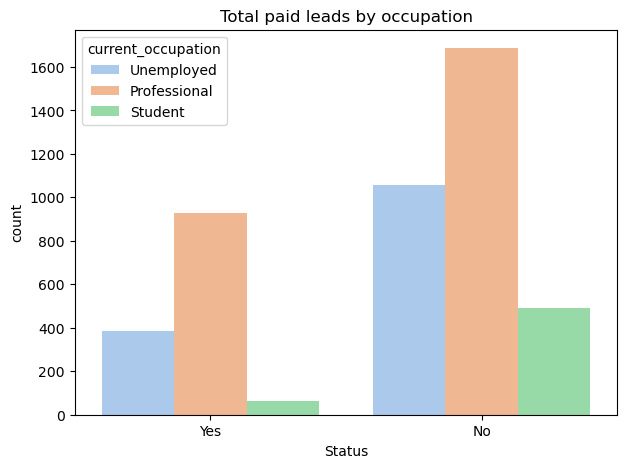

In [13]:
# Plotting the status of all leads in the dataset
plt.figure(figsize=(7,5))
sns.countplot(x=data.status, hue=data.current_occupation, palette='pastel')
plt.title('Total paid leads by occupation')
plt.xlabel('Status')
plt.show()

### Observations:
* Most of leads in the dataset are not paid customers. 
* We have imbalanced data on the target variable wich can affect our prediction model. 
* Professional and unemployeed leads are the real target for the company since from the total paid customers, 67.4% are professionals, 27.8% are unemployeed and only 4.7% are students. 

**Let's understand a little about the demographic of leads by plotting their age and current occupation**

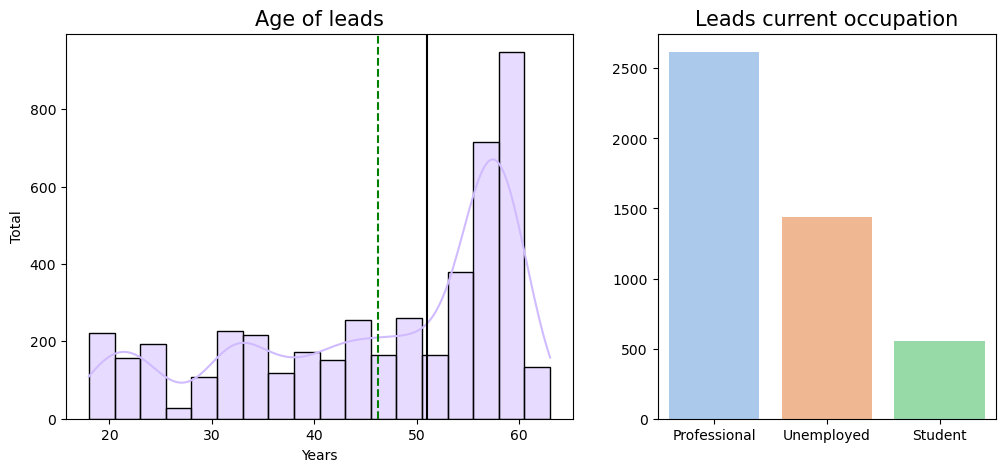

In [14]:
occ_ord=data['current_occupation'].value_counts().index.tolist()

# Plotting age an current occupation of leads
fig, ax = plt.subplots(1,2, figsize=(12,5),gridspec_kw={'width_ratios': [0.6, 0.4 ]})
sns.histplot(x=data.age, ax =ax[0], kde=True, color=clrs[4])
sns.countplot(x=data.current_occupation,palette='pastel', order=occ_ord, ax=ax[1])
ax[0].set_title('Age of leads', fontsize=15)
ax[0].set(xlabel='Years', ylabel='Total')
ax[1].set_title('Leads current occupation', fontsize=15)
ax[1].set(xlabel='', ylabel='')

# Add mean to the histogram
ax[0].axvline(data['age'].mean(), color = "green", linestyle = "--") 
# Add median to the histogram
ax[0].axvline(data['age'].median(), color = "black", linestyle = "-") 



<Figure size 640x480 with 0 Axes>

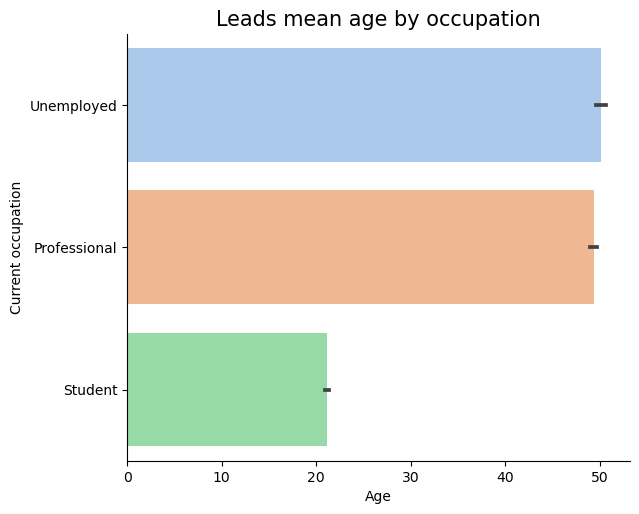

In [15]:
# Visualizing leads mean age by their current occupation
plt.figure()
sns.catplot(data=data, x='age', y='current_occupation', kind='bar', palette='pastel', aspect=1.3)
plt.title('Leads mean age by occupation', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Current occupation')
plt.show()

<Figure size 640x480 with 0 Axes>

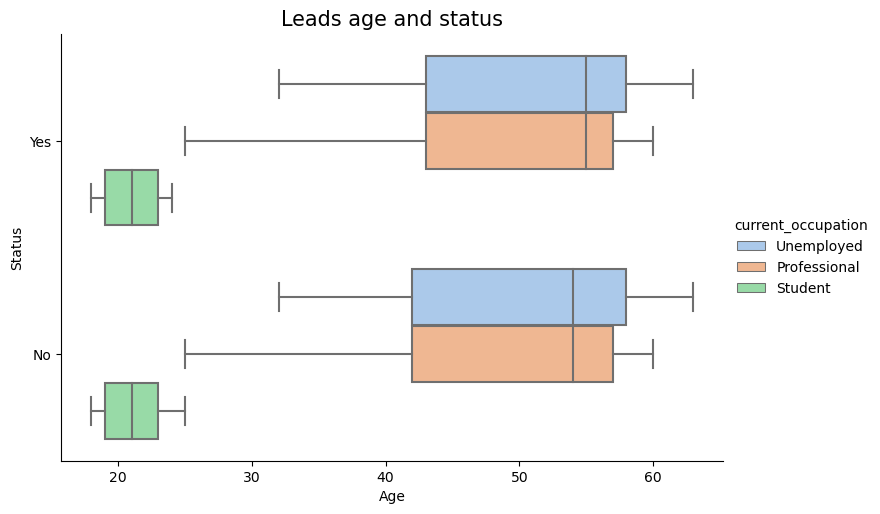

In [16]:
# Plotting the age of leads depending on its current occupation and status
plt.figure()
sns.catplot(data=data, x = 'age', hue='current_occupation', y='status', kind='box', aspect=1.5, palette='pastel')
plt.title('Leads age and status', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Status')
plt.show()

### Observations:
* From age distribution we notice that leads mean age is 46 years old while the median is 51. 
* Half of leads are professional, 31% are unemployeed and just 12% are students.
* We could notice that the real target for the company, which are professionals and unemployeed, are in average around 50 years old. 
* Leads age distribution on both paid and not paid customers is similar. 

### Analyzing numerical variables

In [17]:
#Creating a function to plot both boxplot and histogram of numerical varibles
def box_histplot(field, color, title, xlabel):
    '''
    Function to plot a boxplot and a histplot from numerical varible 
    with vertical ratio of 0.25, 0.75, respectively. 
    
    field: Numerical column to plot 
    color: hex color code for both plots
    title: title for specific plot
    xlabel: specific label for the x axis
    '''
    fig,ax = plt.subplots(2,1, figsize=(8,5), gridspec_kw={'height_ratios': [0.25, 0.75]}, sharex=True)

    sns.boxplot(data=data, x=field, showmeans=True, color= color,ax=ax[0])
    sns.histplot(data=data, x=field, bins=20, kde = True, color = color,ax=ax[1])

    # Add mean to the histogram
    ax[1].axvline(data[field].mean(), color = "green", linestyle = "--") 
    # Add median to the histogram
    ax[1].axvline(data[field].median(), color = "black", linestyle = "-") 

    fig.suptitle(title)
    ax[0].set(xlabel='')
    ax[1].set(xlabel= xlabel)
    plt.show()

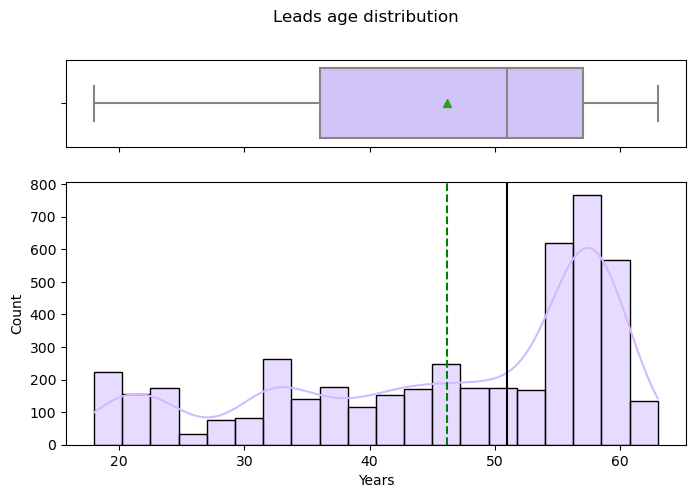

In [18]:
# Plotting the leads age distribution 
box_histplot('age', clrs[4],'Leads age distribution', 'Years' )

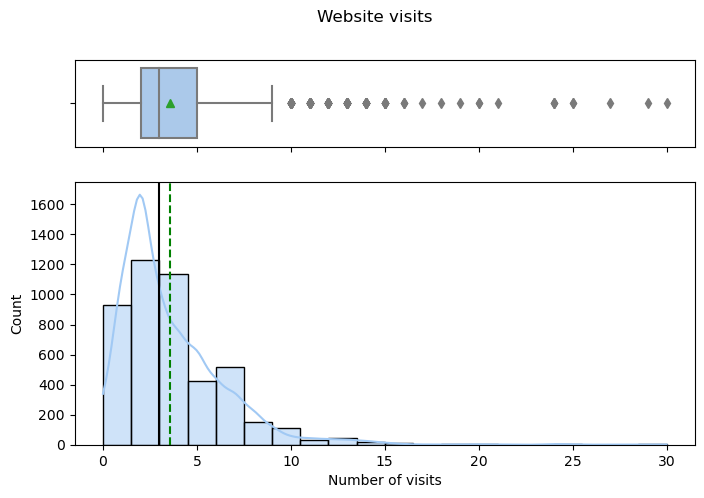

In [19]:
# Plotting the dsitribution of the number of website visits
box_histplot('website_visits', clrs[0],'Website visits', 'Number of visits' )

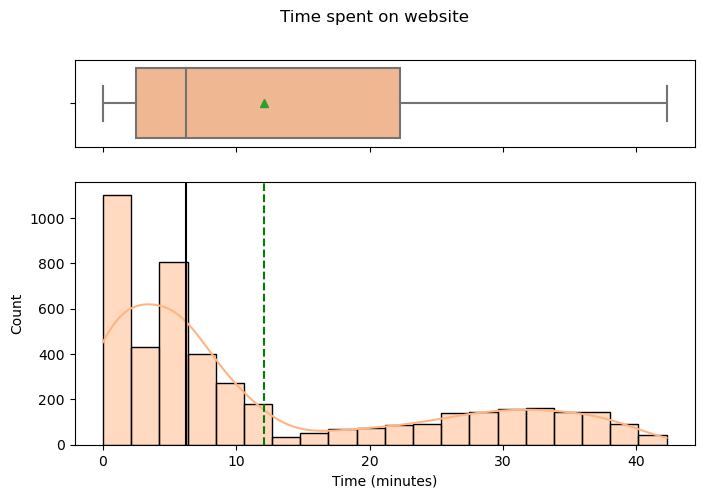

In [20]:
# Distribution of time spent on the website
box_histplot('time_spent_on_website', clrs[1],'Time spent on website', 'Time (minutes)')

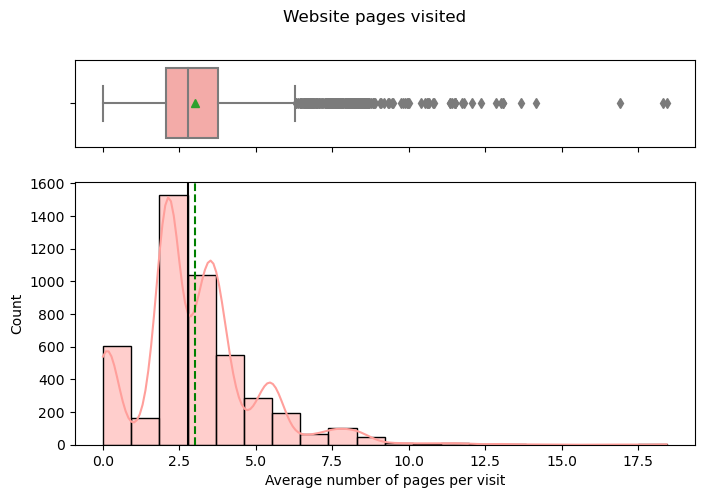

In [21]:
# Distribution of the mean number of website pages visited
box_histplot('page_views_per_visit', clrs[3],'Website pages visited', 'Average number of pages per visit'  )

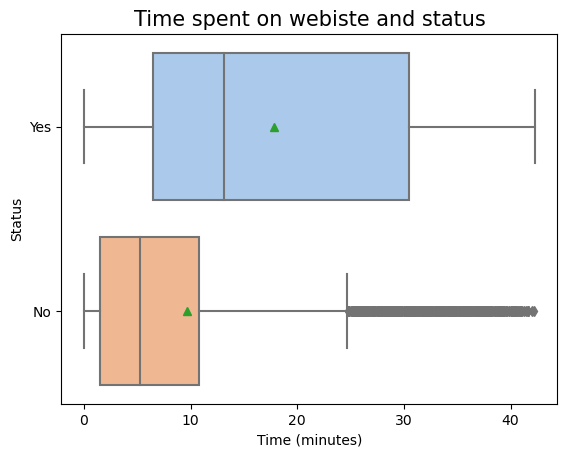

In [22]:
# Plotting the time spent on website as well as current ocuppation and status of leads
plt.figure()
sns.boxplot(data=data, x = 'time_spent_on_website', y='status', palette='pastel', showmeans=True)
plt.title('Time spent on webiste and status', fontsize=15)
plt.xlabel('Time (minutes)')
plt.ylabel('Status')
plt.show()

Text(41.039807355967085, 0.5, 'Status')

<Figure size 640x480 with 0 Axes>

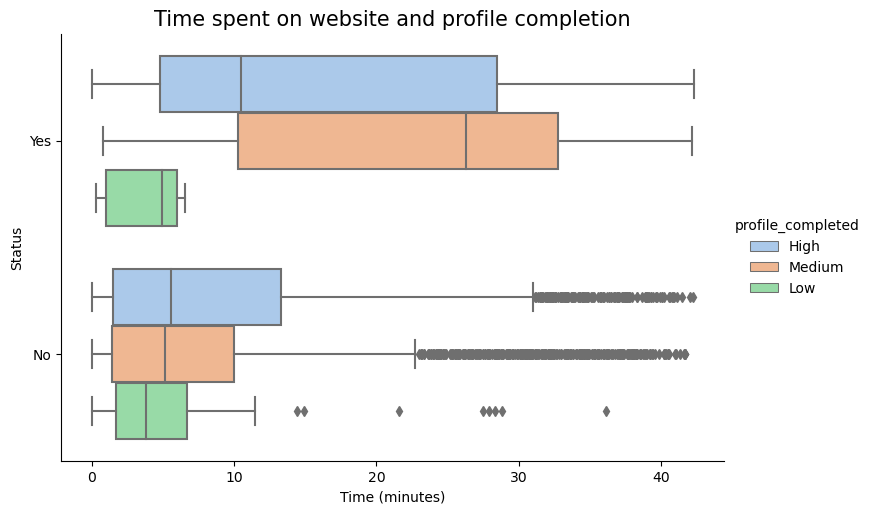

In [23]:
# Visualizing the time spent on website vs the profile completion and status
plt.figure()
sns.catplot(data=data, x='time_spent_on_website', hue='profile_completed',y='status',kind='box', palette='pastel', aspect=1.5)
plt.title('Time spent on website and profile completion', fontsize=15)
plt.xlabel('Time (minutes)')
plt.ylabel('Status')

### Observations: 
* Leads age distribution is left-skewed and, as previously discussed, the mean age is 46 whilst the median is 51 years old. 
* With respect to website visits a lead made we have a right-skewed ditribution with some outliers. In this case, the median and mean are very close, around 3 visits. 
* With respect to the time spent on the website, we have a right-skewd distribution. The mean and median for this variable are 12 minutes and 6 minutes, respectively. Aproximately, 75% of leads spent less than 22 minutes on the website. 
* The average number of pages visited distribution is right-skew with some outliers. Both mean and median are close to 3 visited pages per visit in average. 
* As it is shown abobve, leads who turned to paid customers spent more time on the website in average compared to those who are not paid customers. 
* There is a significant variation in the time spent on website between paid customer with medium and high completed profile. This could mean that people with a high completed profile who actually paid has a strong interest in the platform and thus spends less time on the website completing their profile. 

### Analyzing leads interaction with ExtraaLearn

In [24]:
# Dictionary with variables and titles for plots
inter = {'ttl': ['First interaction','Last interaction','Profile completion'],
        'var': ['first_interaction','last_activity','profile_completed']}

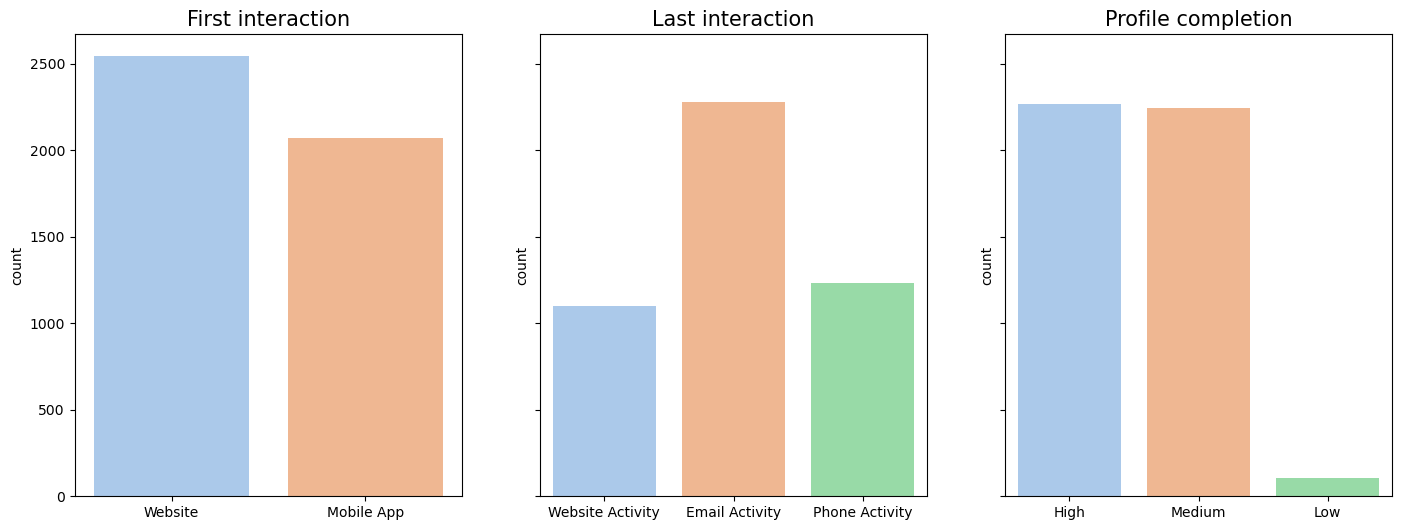

In [25]:
# Let's visualize overall interaction with the platform
fig, ax = plt.subplots(1,3, figsize=(17,6), sharey=True)
for i in range(3):
    sns.countplot(data=data, x=inter['var'][i], palette = 'pastel', ax=ax[i])
    ax[i].set_title(inter['ttl'][i], fontsize=15)
    ax[i].set(xlabel='') 

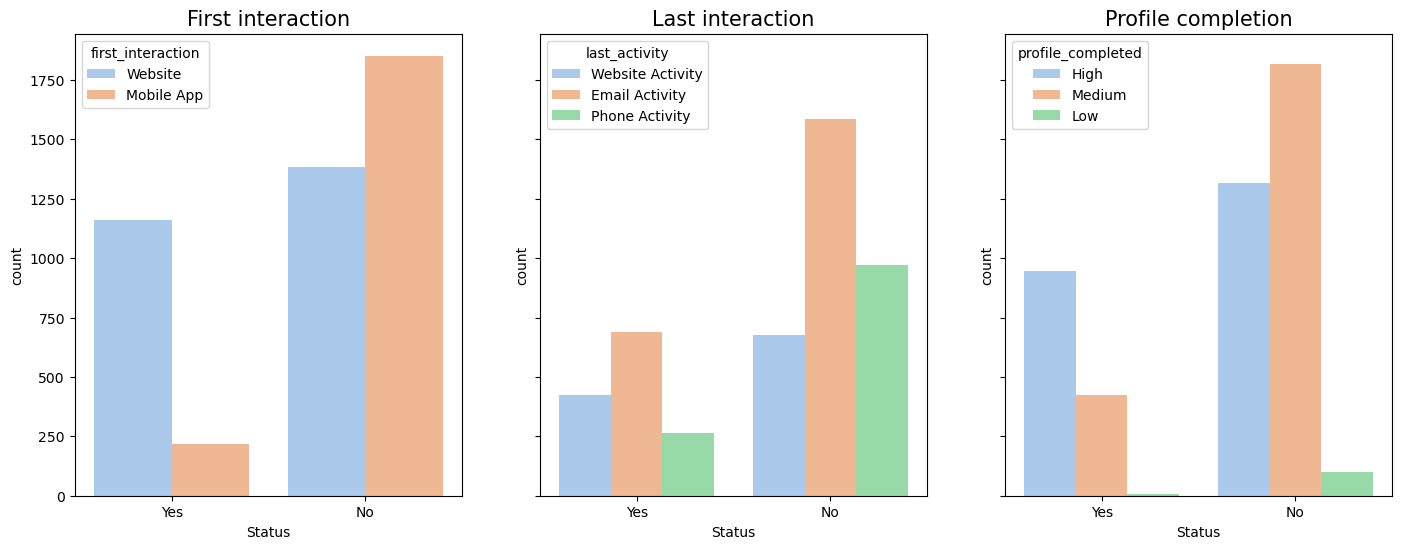

In [26]:
# Visualizing interaction with platform and its final status
fig, ax = plt.subplots(1,3, figsize=(17,6), sharey=True)
for i in range(3):
    sns.countplot(data=data, hue=inter['var'][i], x='status', palette = 'pastel', ax=ax[i])
    ax[i].set_title(inter['ttl'][i], fontsize=15)
    ax[i].set(xlabel='Status') 

### Observations: 
* Most of leads had its first interaction using the website. 
* Very few leads have a low completed profile. 
* The majority of leads had its last interaction with the company by email.

With respect to leads final status (paid customer or not):
* The majority of leads who first interacted with the company by using the website turned to paid customers. 
* Regarding leads last interaction, website and email have most of paid customers. 
* Once again, very few leads who turned to paid customers have a low completed profile. 

### Analyzing ad channels 
Let's quickly analyze if there is a clear impact of different channels ads on the final status of leads. Next variables states if the leads saw the add on that specific channel or not. 

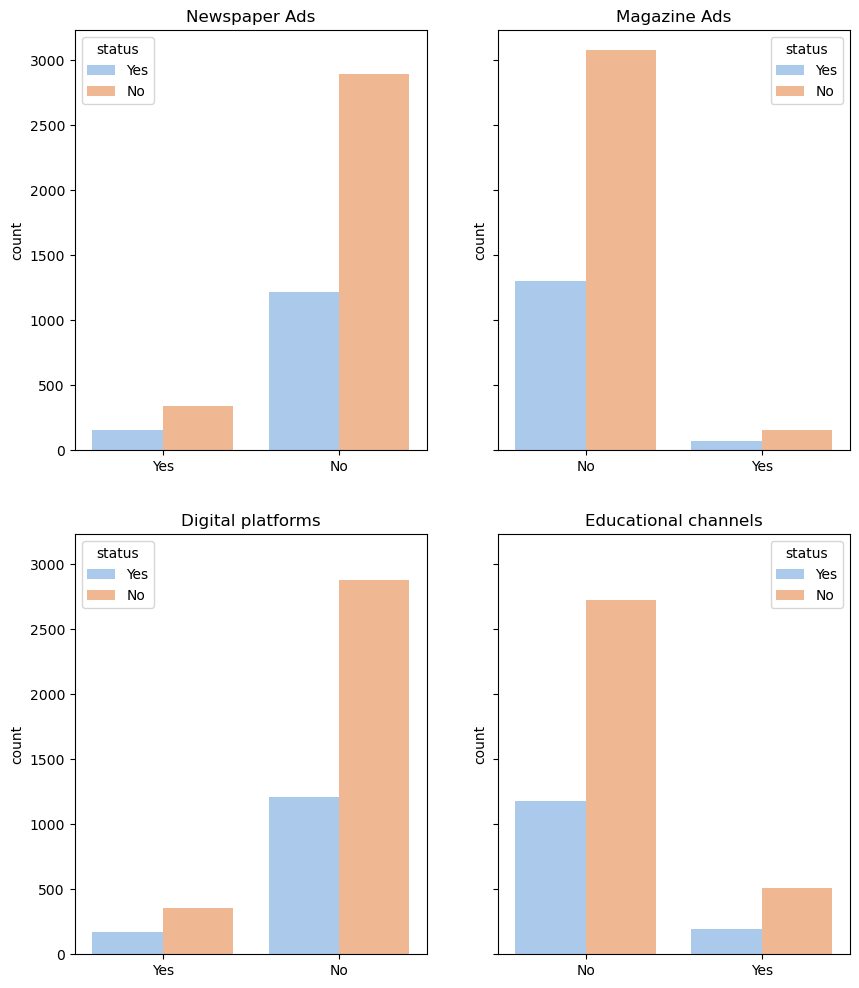

In [27]:
# List with variables of interest and titles for the plots
chan = {'title': ['Newspaper Ads','Magazine Ads','Digital platforms', 'Educational channels'], 
        'media': ['print_media_type1', 'print_media_type2', 'digital_media','educational_channels']}

# Plotting variables
c=0
fig, ax = plt.subplots(2,2, figsize=(10,12), sharey=True)
for i in range(2):
    c=c+i
    for j in range(2):
        c = c+j
        sns.countplot(data=data,x= chan['media'][c] ,hue='status', palette ='pastel',ax=ax[i][j])
        ax[i][j].set_title(chan['title'][c])
        ax[i][j].set(xlabel='') 
    

### Observations: 
* The great majority of leads did not see the add through any channel. 
* From the very few people who saw an add on any channel even fewer turned to be paid customers. 
* At first sight, it seems that any channel is relevent to attract leads to be paid customers. 

<a id="section-3"></a>
## Data preparation


In order to create a correct ML model we need to encode the categorical variables to extract meaningful information.

In this case, there are categorical variables with more than 2 labels that could provide important information, thus we want to keep that information by getting all the dummy columns.

In [28]:
# Encoding categorical variables with more than 2 categories
ndf = pd.get_dummies(data.iloc[:,:8])

# Encoding variables with binary information
cdf = pd.get_dummies(data.iloc[:,8:], drop_first=True)

# Concatenating previous dataframes with encoded information
df = pd.concat([ndf, cdf], axis=1)
df.rename(columns={'status_Yes': 'status'}, inplace=True)

In [29]:
df.shape

(4612, 21)

Now the dataframe consist of 21 columns. As further experimentation, we can think of applying PCA to reduce the dimensionality of our dataset with variables with highest correlation and see if it creates better models. 

For the moment we will take the target variable away from the dataset. At this point it is determined the training and testing datasets. It is considered a proportion of 80% - 20% for the training and testing set, respectively. 

In [30]:
# Separating the target variable from the dataset
y = df['status']
x = df.drop(columns='status')

# Splitting data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True, random_state=1)

x_train.shape, x_test.shape

((3689, 20), (923, 20))

<a id="section-4"></a>
## Model building

### Model evaluation criterion

Model possible wrong predictions: 

1. The model predicts that a lead will turn to paid customer but it doesn't. 
2. The model predicts that a lead will no be a paid customer but it does. 

Which case is more important?

* If the model predicts that a lead will likely be a paid customer but ends up not paying, then the company will allocate most resources on this cases and lose money.  
* If the model predicts a lead will not be a paid customer but it does, then the company will likely not pay too much atention and will end up being paid. 

Hence, False-Negative cases are more important since it could lead to the company losing money by missing possible customers and allocating resources on customers that will not end up paying courses. 

Thus, Recall has to be maximized, meaning lower probabilities to get FN cases. 


**Confussion matrix:**

* **True-Positive**: Model predicted a paid customer and the lead actually turned to a paid customer 
* **True-Negative**: Model predicted a non paid customer and the lead actually did not paid

* **False-Positive**: Model predicted a non paid customer but the lead actually turned to paid customer
* **False-Negative**: Model predicted a paid customer but the lead did not end up being a paid customer


Nos that we have established the evaluation criteria let's define some functions to measure the model performance and to plot relevant tree information. Immediately after defining the metrics it is fitted the model. 

In [31]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predicting using the independent variables
    pred = model.predict(predictors)
    f1 = f1_score(target, pred) # Computes F1-score
    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
    acc = accuracy_score(target, pred)    # To compute accuracy score
    
    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
            'F1-score': f1,
        },index = [0],)

    return df_perf

In [32]:
def conf_matrix(model):
    '''
    Function to plot confusion matrix of both training and testing data.
    
    model: fitted classifier.
    '''
    # Setting list with training and testing data
    xy_data = [[x_train, y_train], [x_test, y_test]]
    
    # Setting subplot axes for plots
    fig, ax = plt.subplots(1,2, figsize=(15,6), sharey=True)
    for i in range(2): 
        # Predicting values on training and testing data
        y_pred = model.predict(xy_data[i][0])
        
        # Generating confussion matrix 
        cm = confusion_matrix(xy_data[i][1],y_pred)
        
        # Plotting confussion matrix on a heatmap
        sns.heatmap(cm, annot = True,  fmt = '.2f', 
                    xticklabels = ['Paid', 'Not Paid'], yticklabels = ['Paid', 'Not Paid'],
                    cmap=sns.cubehelix_palette(as_cmap=True), cbar=True, ax=ax[i])
        
    # Settiing titles
    fig.suptitle('Confusion matrix', fontsize=20)
    ax[0].set_title('Training data')
    ax[1].set_title('Testing data')


In [33]:
# Getting a list with column names from the dependent variable
features = x.columns.tolist()
def tree_plot(model):    
    '''
    Function to plot the specified model decision tree with depth 3
    model: Fitted classifier
    '''
     # Plotting decision tree with depth = 3
    plt.figure(figsize=(20,10))
    tree.plot_tree(model, feature_names = features, max_depth=3,
                   filled = True, fontsize = 10, 
                   node_ids = False, class_names = ['Not Paid', 'Paid'], label='root')
    

In [34]:
def importance(model):
    '''
    Function to plot the feature importance from the specified model
    model: Fitted classifier.
    '''
    # Getting importances 
    importances = model.feature_importances_

    # Creating a dataframe with sorted feature importances
    imp_df = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)

    # Plotting importances
    plt.figure(figsize=(8,6))
    sns.barplot(x=imp_df.Importance, y=imp_df.index, palette='pastel')
    plt.title('Feature importance')
    plt.xlabel('Importance')


<a id="section-5"></a>
## Decision tree classifier

Once the training dataset is ready we can proceed with fitting a model by calling the scikit learn class, DecisionTreeClassifier. 

In [35]:
# Setting the class with a reproducible random state. 
d_tree = tree.DecisionTreeClassifier(random_state=1)

# Fitting the decision tree model to our training set. 
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

Now that we have fitted a model to our training data, we want to compare the performance of the model on both the training and testing dataset to analyze if the model is overfitting. 

In [36]:
# Fitted decision tree depth
d_tree.get_depth()

24

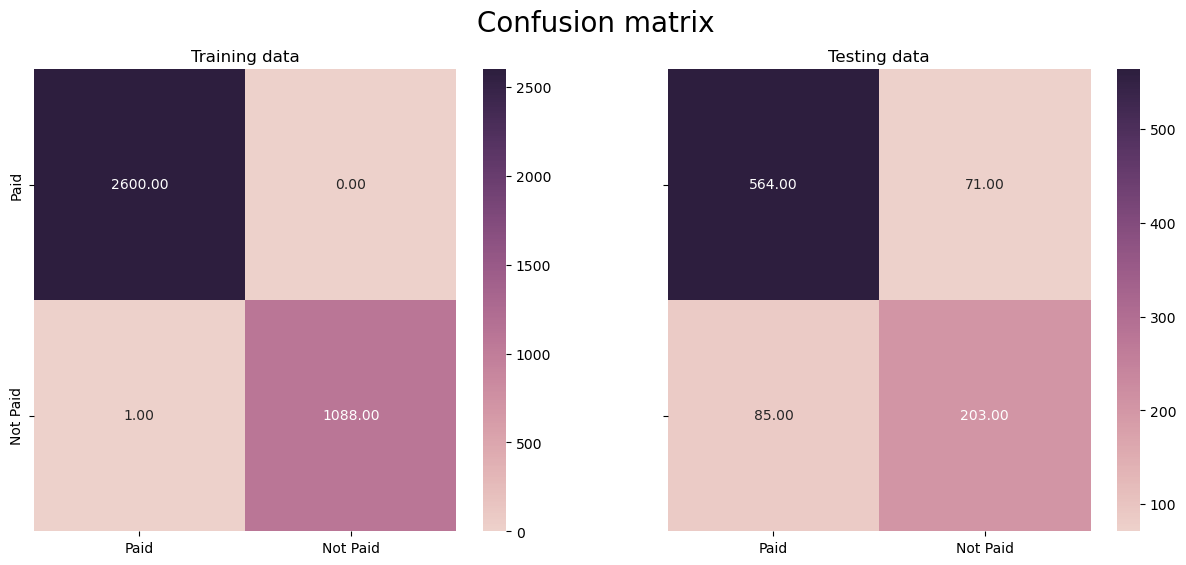

In [37]:
# Plotting confusion matrix of training and testing data
conf_matrix(d_tree)

In [38]:
# Printing model performance metrics on training data
model_performance_classification(d_tree, x_train, y_train)

,Precision,Recall,Accuracy,F1-score
0,0.999808,0.999541,0.999729,0.999541


In [39]:
# Printing model performance metrics on testing data
dtree_test = model_performance_classification(d_tree, x_test, y_test)
dtree_test

,Precision,Recall,Accuracy,F1-score
0,0.804953,0.796525,0.830986,0.72242


### Observations: 

* We can notice from confusion matrices, that the model performs perfectly on the training data but fails to predict correctly on the testing data, meaning the model is overfitting. 
* We confirm the model is overfitting by looking at the Recall-score on both datasetst. Recall-score on the training data is 0.99 while on the testing data is 0.79. 

**Although the model is overfitting we can get a first insight of the feature importances as well as the decision tree itself.**

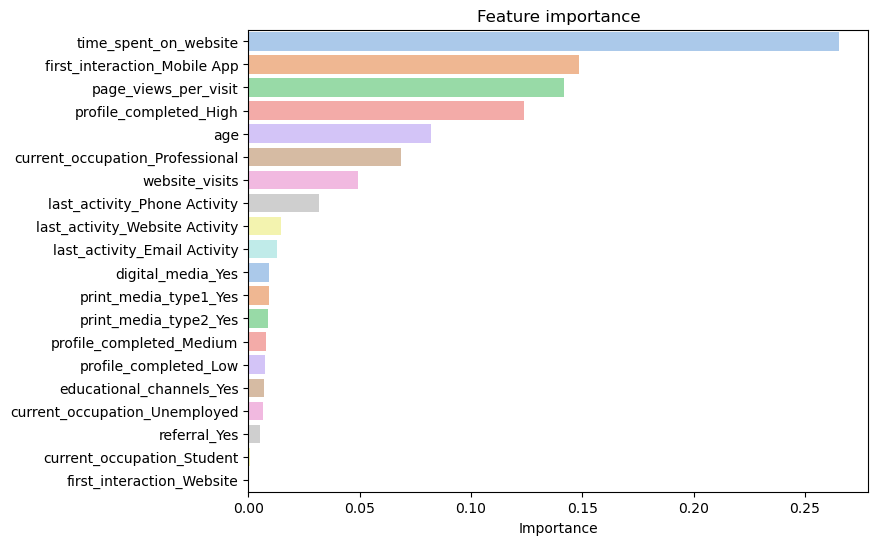

In [40]:
# Plotting feature importances
importance(d_tree)

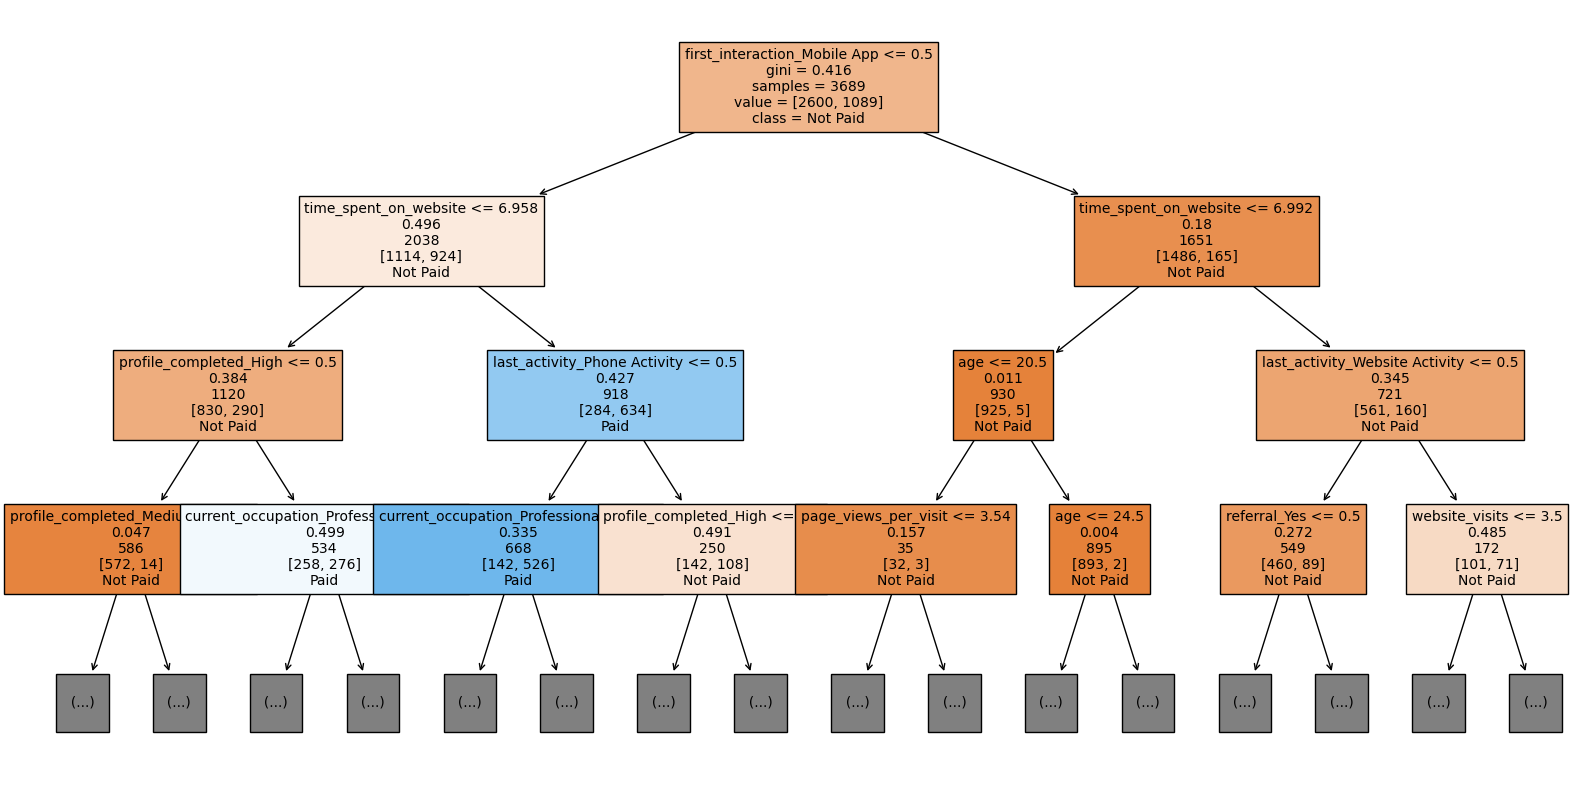

In [41]:
# Plotting first 3 nodes from the decision tree built
tree_plot(d_tree)

### Observations:
* The top 5 features the model takes as more important are the time spent on website, first interaction by mobile app, the average web pages visited, high completed profile, and age, respectively. 
* Feature importance make sense since really interested people will look more deeply into what the platform has to offer, and thus will spent more time on the website visiting more pages. 
* It is also expected that having a high completed profile will raise the probabilities to paid for courses. 


<a id="section-6"></a>
## Decision tree hyperparameter tuning

As previously noticed in the exploratory analysis, our target variable is imbalanced since, aproximately, only 30% of leads are converted to paid customer. We can adjust this imbalance by using the class_weight parameter from the classifier, setting the oposite weights, 0.7 for class 1 (paid customers), and 0.3 for class 0 (not paid customers). 

Then the tree is tuned using cross validation algortim from scikit learn to get the best estimator.

In [42]:
# Adjusting class weights on the classifier
d_tree_tuned = tree.DecisionTreeClassifier(random_state=1, class_weight= {0: 0.3, 1: 0.7})

# Grid of hyperparameters to chose
parameters = {'max_depth': np.arange(1,10), 
              'criterion': ['gini','entropy'], 
              'min_samples_leaf': [20,25]}

# Scoring to compare the parameter combinations. F1-score for class 1 in this case
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Running Grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)

grid_obj = grid_obj.fit(x_train, y_train)

# Select the best estimator i.e. the tree with highest F1-score
d_tree_tuned = grid_obj.best_estimator_

# Fit the training data to the best estimator
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=20, random_state=1)

In [43]:
# Parameters chosen to get the best estimator
print(grid_obj.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 20}


Grid search cross validation gives as result a tree with max depth of 3 and minimum samples at the lead node of 20 as the best estimator.

Once the decision tree is tuned, it is time to evaluate its performance by comparing it with the training and testint data. 

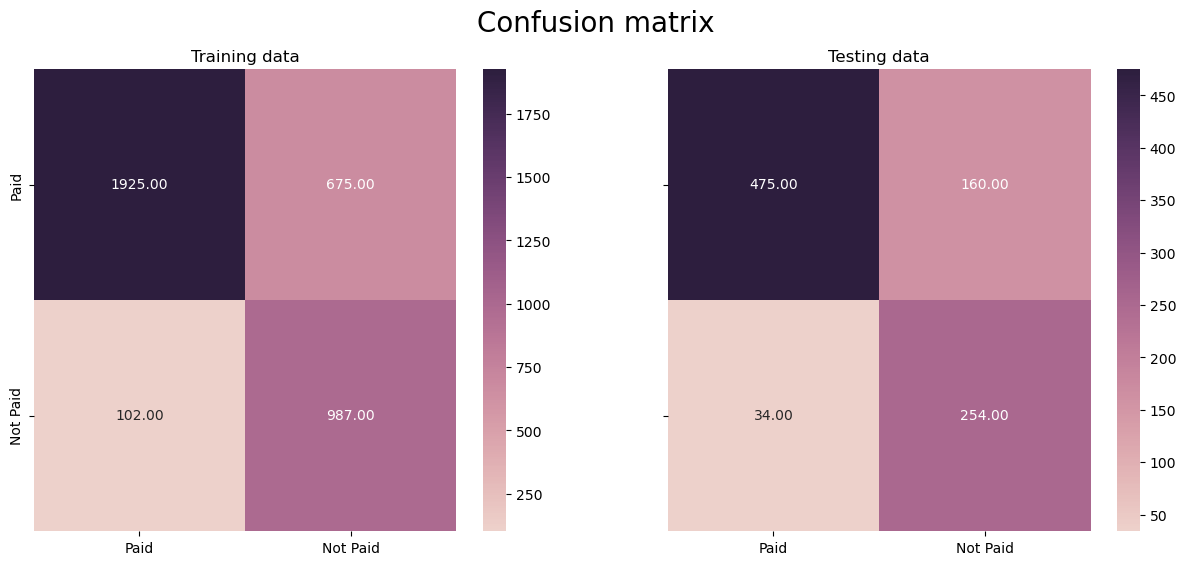

In [44]:
# PLotting confusion matrix for the tuned model
conf_matrix(d_tree_tuned)

In [45]:
# Printing tuned model performance on training data
model_performance_classification(d_tree_tuned, x_train, y_train)

,Precision,Recall,Accuracy,F1-score
0,0.771771,0.82336,0.789374,0.717557


In [46]:
# Printing tuned model performance on testing data
dtree_tuned_test = model_performance_classification(d_tree_tuned, x_test, y_test)
dtree_tuned_test

,Precision,Recall,Accuracy,F1-score
0,0.773364,0.814988,0.789816,0.723647


### Observations: 

* As it is expected from reducing the tree depth, the models performance on the training data has decreased. 
* We notice that now the model is able to generalize by looking at the performance on the testing data. 
* The depth of tree has been significantly reduced, originally, it had a depth of 24 and after tuning the model it is now depth 3.

**Let's check the feature importance for this model as well as the plotted tree**

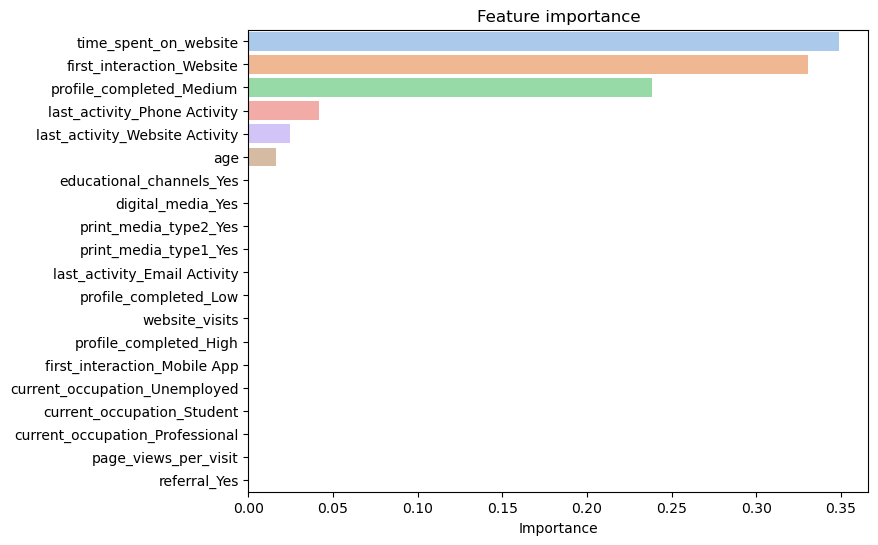

In [47]:
# Plotting feature importances for the tuned model
importance(d_tree_tuned)

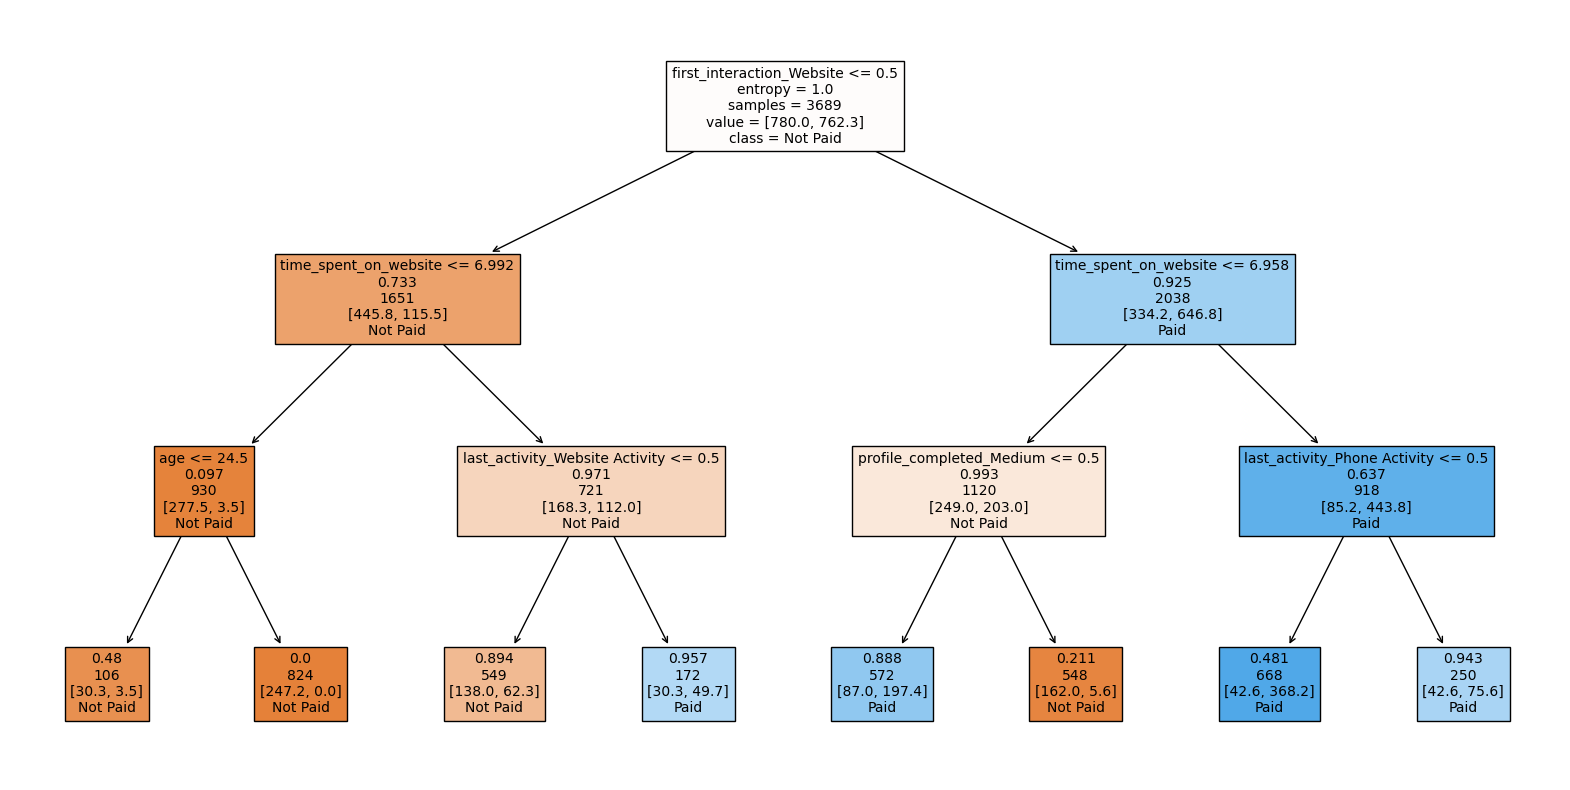

In [48]:
# Plotting first 3 nodes from the decision tree built
tree_plot(d_tree_tuned)

### Observations: 
* After tuning the model it exhibits a higher bias since the importance of many feature has deacreased. 
* We notice that top features remain on top such as time spent on website, high completed profile, age and professional occupation. 
* As expected, the time spent on website is the most important feature to estimate potential customers.
* Now the first interaction by website is 2nd most important feature which also makes sense since we tend to make serious decision using the laptop instead of a cellphone. 
* Overall, we could say that people who are more likely to pay, spent more time on the website, have a high completed profile and are currently professionals. 

<a id="section-7"></a>
## Random forest classifier

Let's build a random forest and compare its performance with the decision tree built. 

In [49]:
# Initialize random forest 
rf_clf = RandomForestClassifier(random_state=1, class_weight= {0: 0.3, 1: 0.7})

# Fitting model into the training data
rf_clf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

In [50]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 0.3, 1: 0.7},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

Once we have fitted the training data into the random forest we can evaluate its performance on both the training and testing data. 

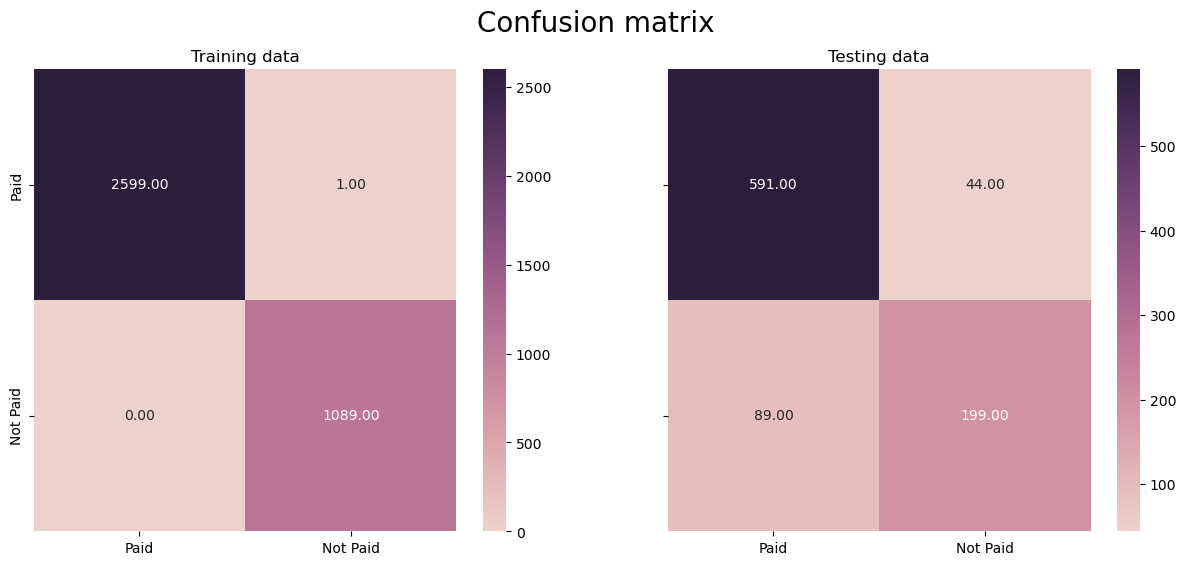

In [51]:
# Plotting confusion matrix of training and testing data
conf_matrix(rf_clf)

In [52]:
# Printing performance of random forest on trainig data
model_performance_classification(rf_clf, x_train, y_train)

,Precision,Recall,Accuracy,F1-score
0,0.999541,0.999808,0.999729,0.999541


In [53]:
# Printing performance of random forest on testing data
rf_test = model_performance_classification(rf_clf, x_test, y_test)
rf_test

,Precision,Recall,Accuracy,F1-score
0,0.844024,0.81084,0.855905,0.749529


### Observations: 

* Random forest model is clearly overfitting. Recall-score is perfect for the training data whilst on the testing it rounds to 0.84, thus the model is not able to generalize. 
* Altough the model is overfitting we can check the feature importance just to compare with the previous model. 


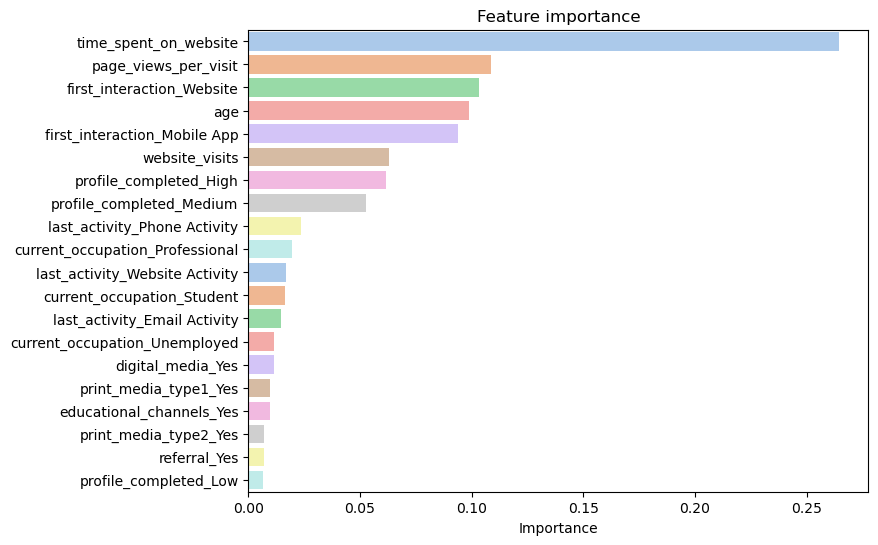

In [54]:
importance(rf_clf)

### Observations: 
* As it is expected from overfitting, more features are considered and given a higher importance. 
* Nevertheless, we notice that top features remain on top. 

**Let's tune parameters from our random forest and evaluate its performance.**

<a id="section-8"></a>
## Random forest hyperparameter tuning

In [55]:
# Adjusting class weights on the classifier
rf_clf_tuned = RandomForestClassifier(random_state=1, class_weight= {0: 0.3, 1: 0.7})

# Grid of hyperparameters to chose
parameter_rf = {
        "n_estimators": [100, 250, 300],
        "min_samples_leaf": [15, 17, 20, 22]
        #"max_features": [0.7, 0.9, 'auto'],
}

# Scoring to compare the parameter combinations. Recall for class 1 in this case
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Running Grid search
grid_obj = GridSearchCV(rf_clf_tuned, parameter_rf, scoring=scorer, cv=7)

grid_obj = grid_obj.fit(x_train, y_train)

# Select the best estimator i.e. the tree with highest F1-score
rf_clf_tuned = grid_obj.best_estimator_

# Fit the training data to the best estimator
rf_clf_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, min_samples_leaf=15,
                       n_estimators=300, random_state=1)

In [56]:
rf_clf_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 0.3, 1: 0.7},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

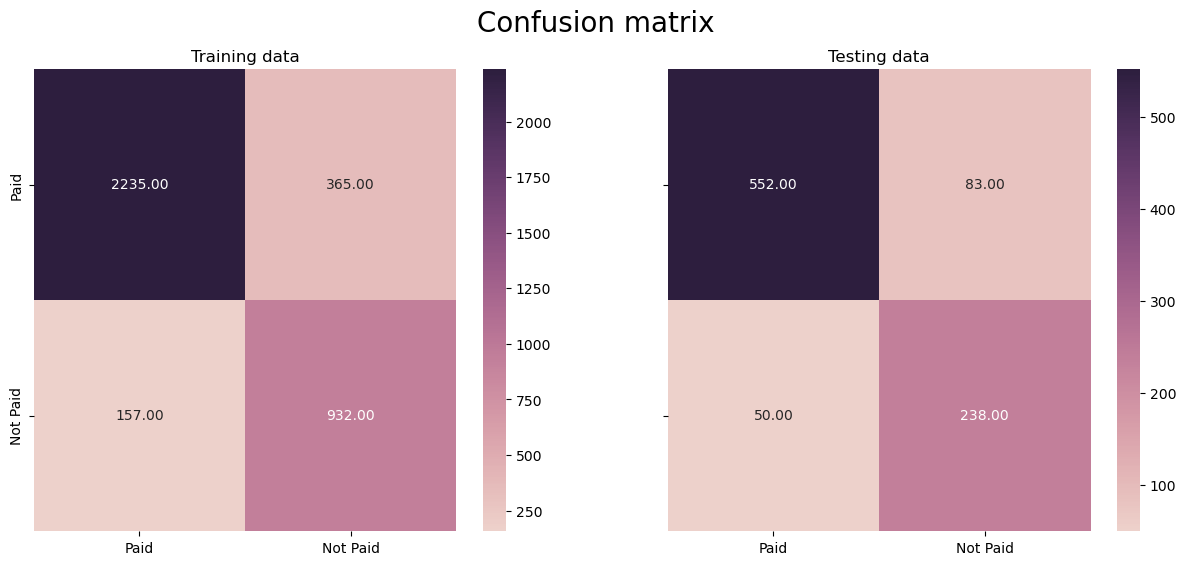

In [57]:
# Plotting confusion matrix of training and testing data
conf_matrix(rf_clf_tuned)

In [58]:
model_performance_classification(rf_clf_tuned, x_train, y_train)

,Precision,Recall,Accuracy,F1-score
0,0.826473,0.857723,0.858498,0.781224


In [59]:
rf_tuned_test = model_performance_classification(rf_clf_tuned, x_test, y_test)
rf_tuned_test

,Precision,Recall,Accuracy,F1-score
0,0.829188,0.84784,0.855905,0.781609


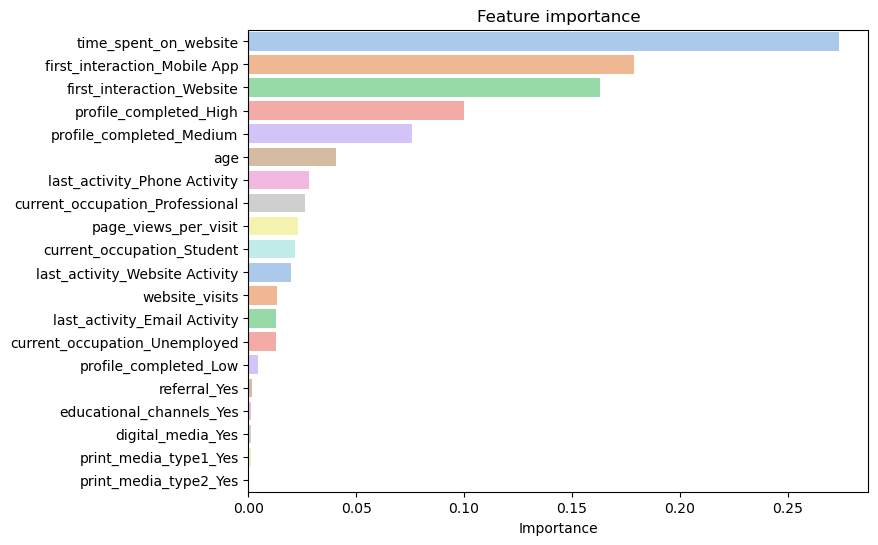

In [60]:
# Getting importances 
importance(rf_clf_tuned)

### Observations: 
* The tuned random forest algorithm shows a good performance with recall of 0.84. 
* There are more features involved in this model. 
* Top important features are coherent with the previous exploratory data analysis. Time spent on website as well as a high completed profile are on top. 

### Models comparisson
Once we have trained the models let's compare its performances and chose the best for this case. Altough precision, recall, accuracy and f1 score are computed for each model, we are only interested in recall score as it was previously stated. 

In [61]:
# Concatenating metrics from all models
models_test_comp_df = pd.concat([dtree_test.T, dtree_tuned_test.T, rf_test.T, rf_tuned_test.T], axis = 1)

models_test_comp_df.columns = ["Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier"]

models_test_comp_df

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier
Precision,0.804953,0.773364,0.844024,0.829188
Recall,0.796525,0.814988,0.810840,0.847840
Accuracy,0.830986,0.789816,0.855905,0.855905
F1-score,0.722420,0.723647,0.749529,0.781609


**The tuned random forest classifiers is the best model for our prediction purposes. Its recall score on the testing data is 0.84.** 

The specific parameters for the random forest are printed below. 

In [62]:
# Tuned random forest parameters
rf_clf_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 0.3, 1: 0.7},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

<a id="section-9"></a>
## Business insights and conclusions


### Recommendations:
* As it was mentioned on EDA section, leads with higher interest in the platform spent more time on the website, hence it is the most important feature to predict whether a lead will turn or not to be a paid customer. 
* Furthermore, the company should look more deeply into leads with medium or high profile completed since it is also an important feature. As it was previously discussed, very few leads with low completed profile turns to paid customers. 
* Another important factor is the age. In previous sections we noticed that older leads are more likely to be paid customers. 
* Keeping track of customer via phone calls or sms, seems to be important for leads conversion. 
* On the other hand, further resarch on ads publishing should managed in order to make ads more effective. 

### Conclusions:
* It was built a model for the company to predict wich leads are more likely to turn to paid customers based on the collected data.
* The tuned random forest is chosen to be the best model, specific parameters are given in previous section. The recall score of the model is ~0.85. 
* The most important features seems to be the time spent on website, first interaction (through website or mobile app), profile completion (high and medium), and age. 
